<a href="https://colab.research.google.com/github/Amogh-S-Acharya/Fifth_Sem_ML_Lab/blob/main/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

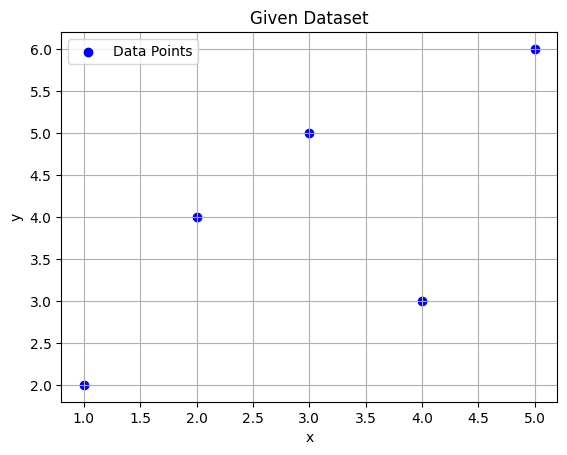

 Given Data:
x = [1 2 3 4 5]
y = [2 4 5 3 6]

x̄ (mean of x) = 3.000
ȳ (mean of y) = 4.000
Spread (Σ(xi - x̄)²) = 10.000

 Linear Regression (OLS):
m (slope) = 0.7000
c (intercept) = 1.9000


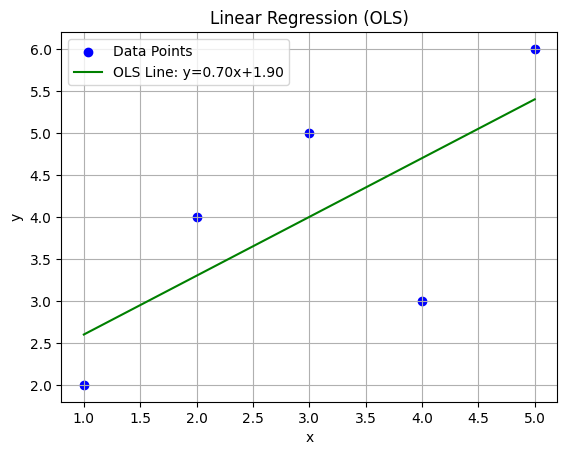

 Ridge Regression:
λ = 0.5
m_ridge = 0.6667
c_ridge = 2.0000


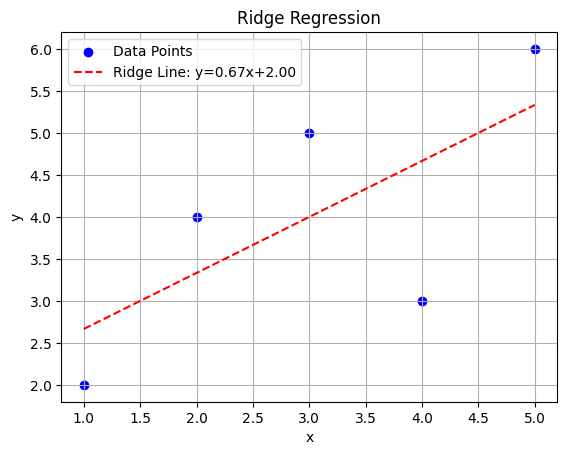

 Lasso Regression:
λ = 0.5
s (spread) = 10.000
sign(m_ols) = 1.0
m_lasso = 0.6500
c_lasso = 2.0500


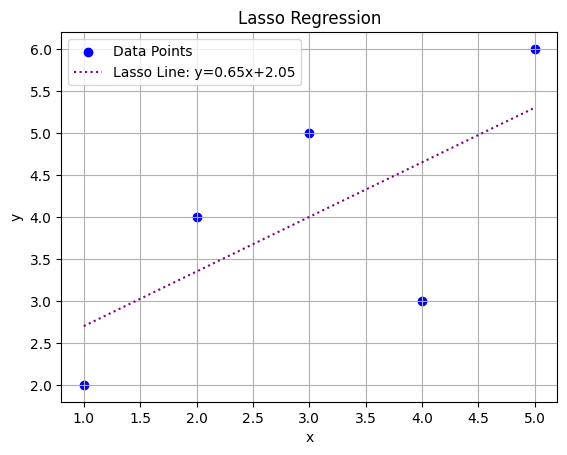


 Mean Squared Error (MSE) Comparison:
  OLS   : 1.0200
  Ridge : 1.0222
  Lasso : 1.0250

 Best model for this dataset: OLS


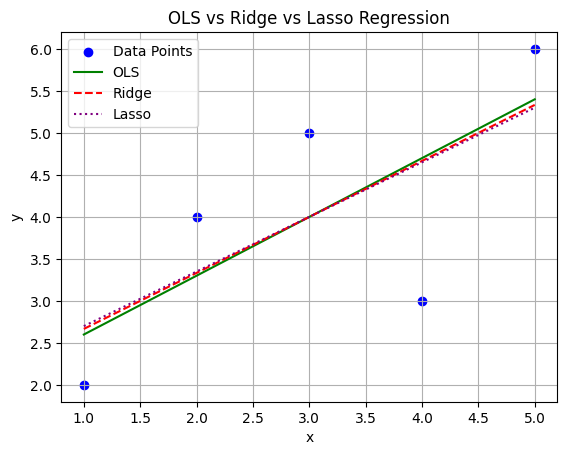


 Explanation:
• OLS minimizes squared error but may overfit if data is noisy.
• Ridge adds an L2 penalty, reducing slope magnitude smoothly.
• Lasso adds an L1 penalty, can drive small slopes exactly to zero.
• Based on lowest MSE, OLS performs best for this dataset.


In [4]:

import numpy as np
import matplotlib.pyplot as plt


x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 3, 6])
lam = 0.5


plt.scatter(x, y, color='blue', label='Data Points')
plt.title("Given Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(" Given Data:")
print("x =", x)
print("y =", y)
print()


x_mean = np.mean(x)
y_mean = np.mean(y)
num = np.sum((x - x_mean) * (y - y_mean))
den = np.sum((x - x_mean) ** 2)
spread = np.sum((x - x_mean) ** 2)  # correct definition of s

print(f"x̄ (mean of x) = {x_mean:.3f}")
print(f"ȳ (mean of y) = {y_mean:.3f}")
print(f"Spread (Σ(xi - x̄)²) = {spread:.3f}")
print()


m_ols = num / den
c_ols = y_mean - m_ols * x_mean
y_pred_ols = m_ols * x + c_ols

print(" Linear Regression (OLS):")
print(f"m (slope) = {m_ols:.4f}")
print(f"c (intercept) = {c_ols:.4f}")

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_ols, color='green', label=f'OLS Line: y={m_ols:.2f}x+{c_ols:.2f}')
plt.title("Linear Regression (OLS)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


m_ridge = num / (den + lam)
c_ridge = y_mean - m_ridge * x_mean
y_pred_ridge = m_ridge * x + c_ridge

print(" Ridge Regression:")
print(f"λ = {lam}")
print(f"m_ridge = {m_ridge:.4f}")
print(f"c_ridge = {c_ridge:.4f}")

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_ridge, color='red', linestyle='--', label=f'Ridge Line: y={m_ridge:.2f}x+{c_ridge:.2f}')
plt.title("Ridge Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


sign = np.sign(m_ols)
m_lasso = sign * max(0, abs(m_ols) - lam / spread)
c_lasso = y_mean - m_lasso * x_mean
y_pred_lasso = m_lasso * x + c_lasso

print(" Lasso Regression:")
print(f"λ = {lam}")
print(f"s (spread) = {spread:.3f}")
print(f"sign(m_ols) = {sign}")
print(f"m_lasso = {m_lasso:.4f}")
print(f"c_lasso = {c_lasso:.4f}")

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_lasso, color='purple', linestyle=':', label=f'Lasso Line: y={m_lasso:.2f}x+{c_lasso:.2f}')
plt.title("Lasso Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


mse_ols = np.mean((y - y_pred_ols) ** 2)
mse_ridge = np.mean((y - y_pred_ridge) ** 2)
mse_lasso = np.mean((y - y_pred_lasso) ** 2)

print("\n Mean Squared Error (MSE) Comparison:")
print(f"  OLS   : {mse_ols:.4f}")
print(f"  Ridge : {mse_ridge:.4f}")
print(f"  Lasso : {mse_lasso:.4f}")

mse_values = {
    "OLS": mse_ols,
    "Ridge": mse_ridge,
    "Lasso": mse_lasso
}
best_model = min(mse_values, key=mse_values.get)
print(f"\n Best model for this dataset: {best_model}")


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_ols, color='green', label='OLS')
plt.plot(x, y_pred_ridge, color='red', linestyle='--', label='Ridge')
plt.plot(x, y_pred_lasso, color='purple', linestyle=':', label='Lasso')
plt.title("OLS vs Ridge vs Lasso Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


print("\n Explanation:")
print("• OLS minimizes squared error but may overfit if data is noisy.")
print("• Ridge adds an L2 penalty, reducing slope magnitude smoothly.")
print("• Lasso adds an L1 penalty, can drive small slopes exactly to zero.")
print(f"• Based on lowest MSE, {best_model} performs best for this dataset.")
